## Root-Finding Methods

**Student:** Altynay Yertay
**Course:** Numerical Methods
**Selected Function (Function 9):**

\[
f(x) = e^x - 3x
\]

**Tolerance:** \(\varepsilon = 10^{-3}\)
**Maximum number of iterations:** \(N_{max} = 100\)

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [168]:
def f(x):
    return np.exp(x) - 3*x

def df(x):
    return np.exp(x) - 3

def g(x):
    return np.exp(x) / 3

In [169]:
def print_table(table, header=("n", "x_n", "f(x_n)", "error")):
    print(f"{header[0]}\t {header[1]}\t\t {header[2]}\t\t {header[3]}")
    for r in table:
        print(f"{r[0]}\t {r[1]:.6f}\t {r[2]:+.6f}\t {r[3]:.6f}")

def plot_function_and_root(f, root, title, xmin=0, xmax=1.2):
    X = np.linspace(xmin, xmax, 400)
    plt.figure(figsize=(7,5))
    plt.plot(X, f(X))
    plt.axhline(0, color="black")
    plt.scatter(root, f(root), color="red")
    plt.text(root, f(root)+0.2, f"root ≈ {root:.6f}", ha="center")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()

def plot_convergence(errors, title, ylabel="Error"):
    plt.figure(figsize=(6,4))
    plt.plot(errors, marker='o')
    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

## Bisection Method

The Bisection Method is a bracketing method that repeatedly halves the interval
containing the root.
Stopping criterion (as in the algorithm):

Bisection Method
Root estimate: 0.619140625
Iterations: 9
Stop reason: tolerance reached 

n	 x_n		 f(x_n)		 error
1	 0.500000	 +0.148721	 0.500000
2	 0.750000	 -0.133000	 0.250000
3	 0.625000	 -0.006754	 0.125000
4	 0.562500	 +0.067555	 0.062500
5	 0.593750	 +0.029516	 0.031250
6	 0.609375	 +0.011156	 0.015625
7	 0.617188	 +0.002145	 0.007812
8	 0.621094	 -0.002319	 0.003906
9	 0.619141	 -0.000091	 0.001953


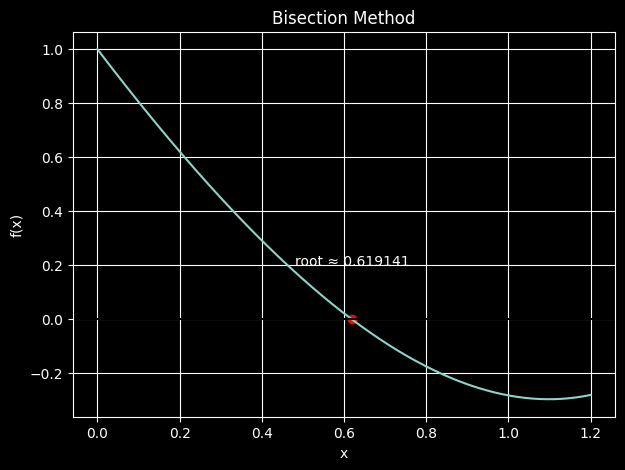

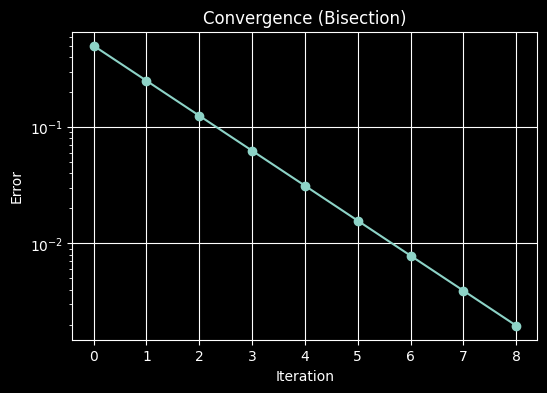

In [170]:
def bisection(f, a, b, eps=1e-3, Nmax=100):
    if f(a)*f(b) > 0:
        return None, [], "invalid interval"

    table = []
    for n in range(1, Nmax+1):
        c = (a + b) / 2
        error = (b - a) / 2
        table.append([n, c, f(c), error])

        if abs(f(c)) < eps or error < eps:
            return c, table, "tolerance reached"

        if f(a)*f(c) < 0:
            b = c
        else:
            a = c

    return c, table, "max iterations reached"


root_b, table_b, reason_b = bisection(f, 0, 1)

print("Bisection Method")
print("Root estimate:", root_b)
print("Iterations:", len(table_b))
print("Stop reason:", reason_b, "\n")

print_table(table_b)

plot_function_and_root(f, root_b, "Bisection Method")
plot_convergence([r[3] for r in table_b], "Convergence (Bisection)")

**Limitations:**
The Bisection Method always converges if the initial interval is valid,
but it converges slowly because the interval is reduced by a fixed factor
at each iteration.

### False Position (Regula Falsi) Method

The False Position method is a bracketing method that uses a linear
interpolation instead of midpoint selection to improve convergence speed.

False Position Method
Root estimate: 0.61948531037289
Iterations: 6
Stop reason: tolerance reached 

n	 x_n		 f(x_n)		 |f(x_n)|
1	 0.780203	 -0.158694	 0.158694
2	 0.673347	 -0.059252	 0.059252
3	 0.635682	 -0.018736	 0.018736
4	 0.623991	 -0.005611	 0.005611
5	 0.620509	 -0.001653	 0.001653
6	 0.619485	 -0.000484	 0.000484


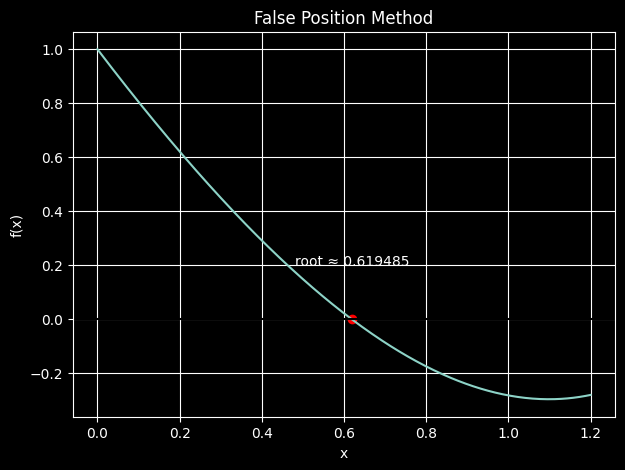

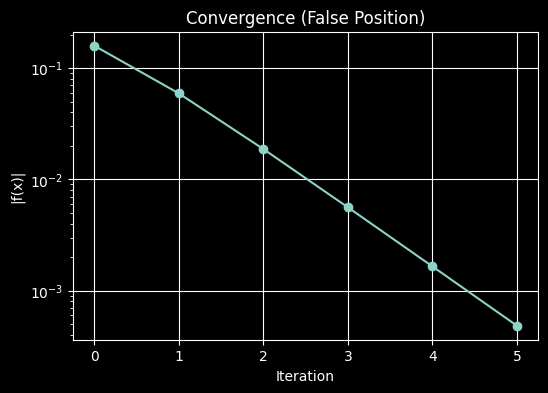

In [171]:
def false_position(f, a, b, eps=1e-3, Nmax=100):
    if f(a)*f(b) > 0:
        return None, [], "invalid interval"

    table = []
    fa, fb = f(a), f(b)

    for n in range(1, Nmax+1):
        c = (a*fb - b*fa)/(fb-fa)
        fc = f(c)
        table.append([n, c, fc, abs(fc)])

        if abs(fc) < eps:
            return c, table, "tolerance reached"

        if fa*fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc

    return c, table, "max iterations reached"


root_f, table_f, reason_f = false_position(f, 0, 1)

print("False Position Method")
print("Root estimate:", root_f)
print("Iterations:", len(table_f))
print("Stop reason:", reason_f, "\n")

print_table(table_f, header=("n","x_n","f(x_n)","|f(x_n)|"))

plot_function_and_root(f, root_f, "False Position Method")
plot_convergence([r[3] for r in table_f], "Convergence (False Position)", "|f(x)|")

**Limitations:**
The method may converge slowly if one endpoint remains fixed for many
iterations.

### Fixed Point Iteration Method

This method rewrites the equation in the form \(x = g(x)\)
and iteratively applies the function until convergence.

Fixed Point Method
Root estimate: 0.617685986239335
Iterations: 9
Stop reason: tolerance reached 

n	 x_n		 f(x_n)		 error
1	 0.549574	 +0.083793	 0.049574
2	 0.577505	 +0.049073	 0.027931
3	 0.593862	 +0.029382	 0.016358
4	 0.603657	 +0.017824	 0.009794
5	 0.609598	 +0.010898	 0.005941
6	 0.613231	 +0.006695	 0.003633
7	 0.615462	 +0.004125	 0.002232
8	 0.616837	 +0.002546	 0.001375
9	 0.617686	 +0.001573	 0.000849


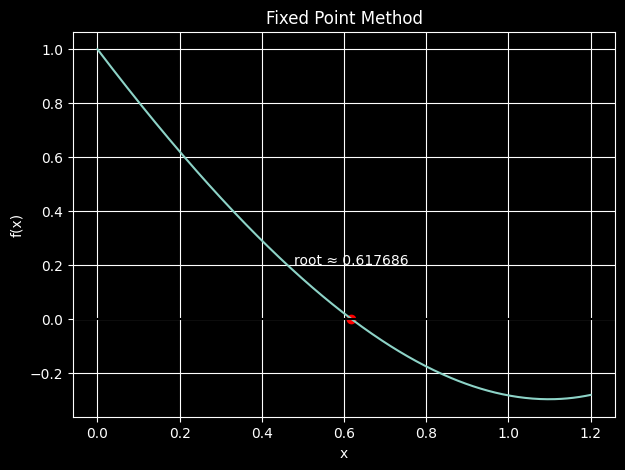

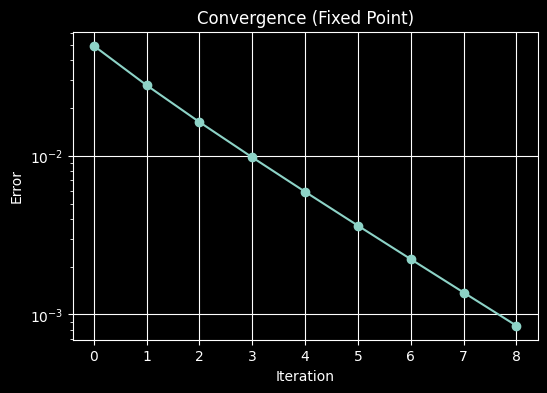

In [172]:
def fixed_point(g, f, x0, eps=1e-3, Nmax=100):
    table = []
    x = x0

    for n in range(1, Nmax+1):
        x_new = g(x)
        error = abs(x_new - x)
        table.append([n, x_new, f(x_new), error])

        if error < eps:
            return x_new, table, "tolerance reached"

        x = x_new

    return x, table, "max iterations reached"


root_fp, table_fp, reason_fp = fixed_point(g, f, 0.5)

print("Fixed Point Method")
print("Root estimate:", root_fp)
print("Iterations:", len(table_fp))
print("Stop reason:", reason_fp, "\n")

print_table(table_fp)

plot_function_and_root(f, root_fp, "Fixed Point Method")
plot_convergence([r[3] for r in table_fp], "Convergence (Fixed Point)")

**Limitations:**
Convergence depends on the choice of the iteration function and
may fail if the derivative magnitude exceeds one.

### Newton–Raphson Method

Newton’s method uses the derivative of the function to achieve
quadratic convergence near the root.

Newton Method
Root estimate: 0.6190612833553127
Iterations: 3
Stop reason: tolerance reached 

n	 x_n		 f(x_n)		 error
1	 0.610060	 +0.010362	 0.110060
2	 0.618997	 +0.000074	 0.008937
3	 0.619061	 +0.000000	 0.000065


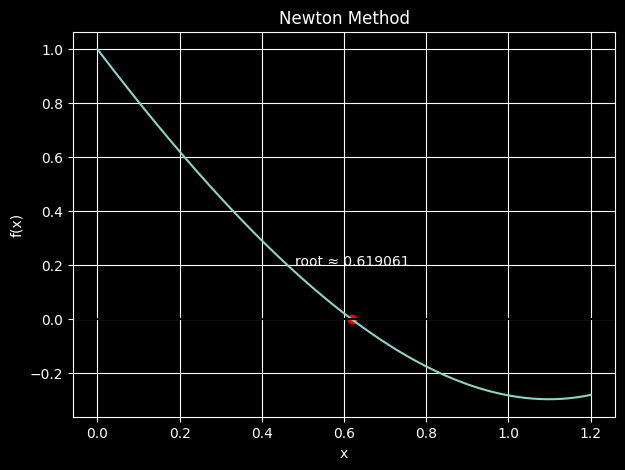

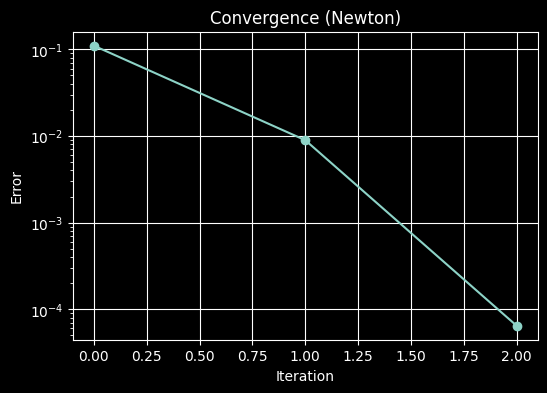

In [173]:
def newton(f, df, x0, eps=1e-3, Nmax=100):
    table = []
    x = x0

    for n in range(1, Nmax+1):
        x_new = x - f(x)/df(x)
        error = abs(x_new - x)
        table.append([n, x_new, f(x_new), error])

        if error < eps:
            return x_new, table, "tolerance reached"

        x = x_new

    return x, table, "max iterations reached"


root_n, table_n, reason_n = newton(f, df, 0.5)

print("Newton Method")
print("Root estimate:", root_n)
print("Iterations:", len(table_n))
print("Stop reason:", reason_n, "\n")

print_table(table_n)

plot_function_and_root(f, root_n, "Newton Method")
plot_convergence([r[3] for r in table_n], "Convergence (Newton)")

**Limitations:**
Requires derivative information and may fail if the derivative is zero
or the initial guess is poor.

### Secant Method

The Secant Method approximates the derivative numerically
using two previous points.

Secant Method
Root estimate: 0.6190613123803635
Iterations: 6
Stop reason: tolerance reached 

n	 x_n		 f(x_n)		 error
1	 0.780203	 -0.158694	 0.219797
2	 0.496679	 +0.153218	 0.283524
3	 0.635952	 -0.019037	 0.139274
4	 0.620560	 -0.001711	 0.015392
5	 0.619040	 +0.000024	 0.001520
6	 0.619061	 -0.000000	 0.000021


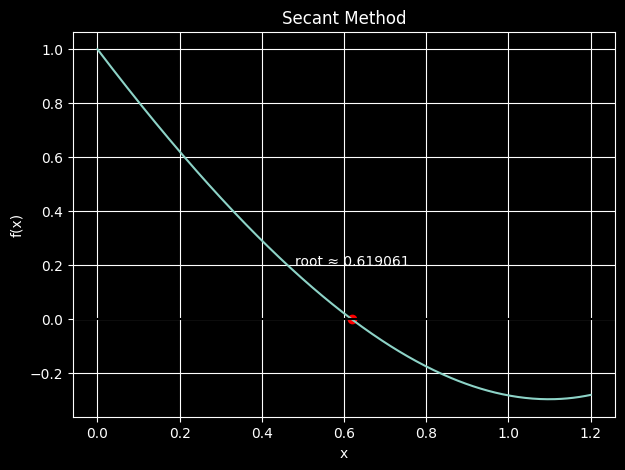

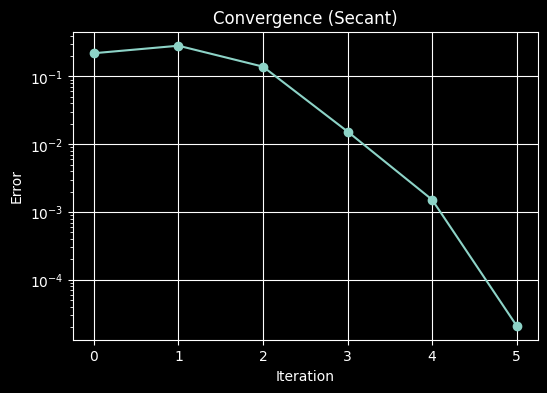

In [174]:
def secant(f, x0, x1, eps=1e-3, Nmax=100):
    table = []

    for n in range(1, Nmax+1):
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        error = abs(x2 - x1)
        table.append([n, x2, f(x2), error])

        if error < eps:
            return x2, table, "tolerance reached"

        x0, x1 = x1, x2

    return x2, table, "max iterations reached"


root_s, table_s, reason_s = secant(f, 0, 1)

print("Secant Method")
print("Root estimate:", root_s)
print("Iterations:", len(table_s))
print("Stop reason:", reason_s, "\n")

print_table(table_s)

plot_function_and_root(f, root_s, "Secant Method")
plot_convergence([r[3] for r in table_s], "Convergence (Secant)")

**Limitations:**
Does not guarantee convergence and depends on initial guesses.

### Muller's Method

Muller’s Method uses quadratic interpolation
and can converge faster than the Secant Method.

Muller Method
Root estimate: 0.6190612014402672
Iterations: 3
Stop reason: tolerance reached 

n	 x_n		 f(x_n)		 error
1	 0.626549	 -0.008505	 0.373451
2	 0.618961	 +0.000114	 0.007588
3	 0.619061	 +0.000000	 0.000100


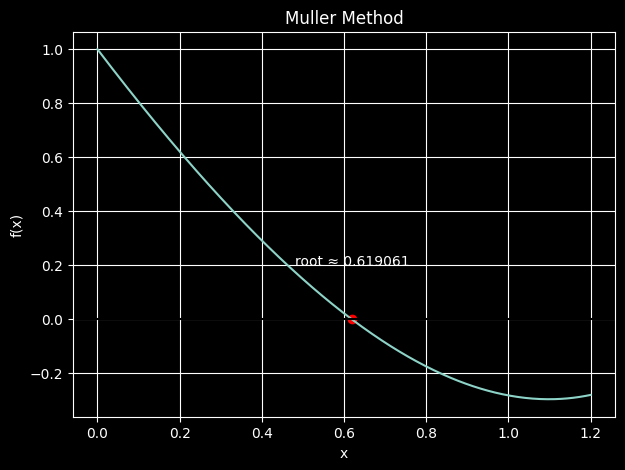

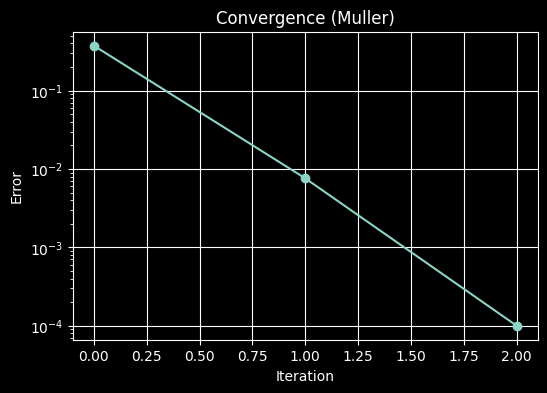

In [175]:
def muller(f, x0, x1, x2, eps=1e-3, Nmax=100):
    table = []

    for n in range(1, Nmax+1):
        f0, f1, f2 = f(x0), f(x1), f(x2)
        h0, h1 = x1-x0, x2-x1

        d0 = (f1-f0)/h0
        d1 = (f2-f1)/h1

        a = (d1-d0)/(h1+h0)
        b = a*h1 + d1
        c = f2

        D = np.sqrt(b*b - 4*a*c)
        denom = b + D if abs(b+D) > abs(b-D) else b - D

        x3 = x2 - 2*c/denom
        error = abs(x3-x2)

        table.append([n, x3, f(x3), error])

        if error < eps:
            return x3, table, "tolerance reached"

        x0, x1, x2 = x1, x2, x3

    return x3, table, "max iterations reached"


root_m, table_m, reason_m = muller(f, 0, 0.5, 1)

print("Muller Method")
print("Root estimate:", root_m)
print("Iterations:", len(table_m))
print("Stop reason:", reason_m, "\n")

print_table(table_m)

plot_function_and_root(f, root_m, "Muller Method")
plot_convergence([r[3] for r in table_m], "Convergence (Muller)")

**Limitations:**
More complex and may fail if complex roots appear.

### Comparison Summary

The table below compares the performance of all methods.

In [176]:
pd.DataFrame({
    "Method": ["Bisection","False Position","Fixed Point","Newton","Secant","Muller"],
    "Iterations": [
        len(table_b),
        len(table_f),
        len(table_fp),
        len(table_n),
        len(table_s),
        len(table_m)
    ]
})

,Method,Iterations
0,Bisection,9
1,False Position,6
2,Fixed Point,9
3,Newton,3
4,Secant,6
5,Muller,3


### Overall Conclusion

All six numerical methods were applied to solve the nonlinear equation
\( f(x) = e^x - 3x \).

Bracketing methods are robust but slow, while open methods converge faster
but depend on initial guesses or derivatives.

The numerical results confirm the theoretical convergence behavior
of each method.